<center><b><h1>Mini-Project On Sentiment Analysis in Finance and Stocks</h1></b></center>

by Aayush Srivastava,IIT Kharagpur Roll No-23AG10003

### What is Sentiment Analysis?
Sentiment analysis classifies whether a text block is positive, negative, or neutral. The goal that Sentiment mining tries to gain is to analyze people's opinions in a way that can help businesses expand. It focuses on polarity (positive, negative & neutral) and emotions (happy, sad, angry, etc.). It uses various Natural Language Processing algorithms such as Rule-based, Automatic, and Hybrid.



Let's consider a scenario if we want to analyze whether a product satisfies customer requirements or if there is a need for this product in the market. We can use sentiment analysis to monitor that product's reviews. Sentiment analysis is also efficient when there is a large set of unstructured data, and we want to classify that data by automatically tagging it. Net Promoter Score (NPS) surveys are used extensively to learn how a customer perceives a product or service. Sentiment analysis also gained popularity due to its ability to process significant NPS responses and obtain consistent results quickly.

###  What are the Types of Sentiment Analysis?

**Fine-Grained Sentiment Analysis** <br>
This depends on the polarity base. This category can be upbeat, positive, neutral, negative, or harmful. The rating is done on a scale of 1 to 5. If the rating is 5, it is very positive, 2 is negative, and three is neutral.<br>
**Emotion detection**<br>
The sentiments happy, sad, angry, upset, jolly, pleasant, and so on come under emotion detection. It is also known as a lexicon method of sentiment analysis.<br>
**Aspect-Based Sentiment Analysis**<br>
It focuses on a particular aspect. For instance, if a person wants to check the features of the cell phone, then it checks the aspects such as the battery, screen, and camera quality, then aspect-based is used.<br>
**Multilingual Sentiment Analysis**<br>
Multilingualism consists of different languages; the classification must be positive, negative, and neutral. This is highly challenging and comparatively difficult.<br><br>
try out Youtube Comments Sentiment Analysis in this __[notebook](https://colab.research.google.com/drive/107uKPiRf4QBteG7X6dlbE0fTQxs_oapN?usp=sharing)__



#### Libraries used - **pandas,transformers,matplotlib**

Firstly we will receive our data with the correct encoding, and add header columns <br>
__[data from kaggle](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news)__

In [1]:
import pandas as pd
df = pd.read_csv('all-data.csv', encoding='latin1')
df.columns = ['GivenSentiment', 'Content'] #adding header columns
df


,GivenSentiment,Content
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [2]:
df=df.sample(200) #lets see a smaller sample , given sentiments are neut,positive,negative
df

,GivenSentiment,Content
1631,neutral,The event can also be viewed as a live webcast...
1523,positive,Finnish retailer Stockmann has won approval fr...
3754,neutral,Tekla Group 's net sales for 2006 were approxi...
3890,neutral,"The program , which was started in the summer ..."
3877,neutral,The order also includes extensive maintenance ...
...,...,...
578,neutral,Patrizia adds the acquisition to a portfolio a...
687,positive,The plan is estimated to generate some EUR 5 m...
107,positive,"In the fourth quarter of 2008 , net sales incr..."
4247,negative,The company plans to close two of the three li...


firstly we will add all our pipelines and pretained models from hugging face <br>
i will use __[this]()__ model 

In [3]:
from transformers import pipeline
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

#setting up our pipeline from hugging face
tokenizer=DistilBertTokenizer.from_pretrained('distilbert/distilbert-base-uncased-finetuned-sst-2-english')
model=DistilBertForSequenceClassification.from_pretrained('distilbert/distilbert-base-uncased-finetuned-sst-2-english')

nlp=pipeline('sentiment-analysis', model=model , tokenizer=tokenizer)
texts=list(df.Content.values)
results=nlp(texts)

In [4]:
for text, result in zip(texts,results): # gather our results and zip them , score denotes confidence
    print('Text',text)
    print('Result',result)

Text The event can also be viewed as a live webcast at www.cargotec.com .
Result {'label': 'NEGATIVE', 'score': 0.9779330492019653}
Text Finnish retailer Stockmann has won approval from the board of Swedish rival Lindex for a public tender offer with the aim of expanding the companies ' presence in Russia and other CEE countries , Stockmann said Monday .
Result {'label': 'POSITIVE', 'score': 0.6227684020996094}
Text Tekla Group 's net sales for 2006 were approximately 50 million euros and operating result 13.6 million euros .
Result {'label': 'POSITIVE', 'score': 0.9281034469604492}
Text The program , which was started in the summer of 2007 , was originally estimated to last approximately two years .
Result {'label': 'NEGATIVE', 'score': 0.9971269965171814}
Text The order also includes extensive maintenance work of a shoe press delivered by Vaahto in 2001 .
Result {'label': 'NEGATIVE', 'score': 0.9921414852142334}
Text In contrast , the company 's net loss for the third quarter of 2009

In [5]:
df['PredictedSentiment']=[i['label'] for i in results] # using list comprehension to add column to our original data
df

,GivenSentiment,Content,PredictedSentiment
1631,neutral,The event can also be viewed as a live webcast...,NEGATIVE
1523,positive,Finnish retailer Stockmann has won approval fr...,POSITIVE
3754,neutral,Tekla Group 's net sales for 2006 were approxi...,POSITIVE
3890,neutral,"The program , which was started in the summer ...",NEGATIVE
3877,neutral,The order also includes extensive maintenance ...,NEGATIVE
...,...,...,...
578,neutral,Patrizia adds the acquisition to a portfolio a...,POSITIVE
687,positive,The plan is estimated to generate some EUR 5 m...,POSITIVE
107,positive,"In the fourth quarter of 2008 , net sales incr...",POSITIVE
4247,negative,The company plans to close two of the three li...,NEGATIVE


now we will count our positive and negative sentiments

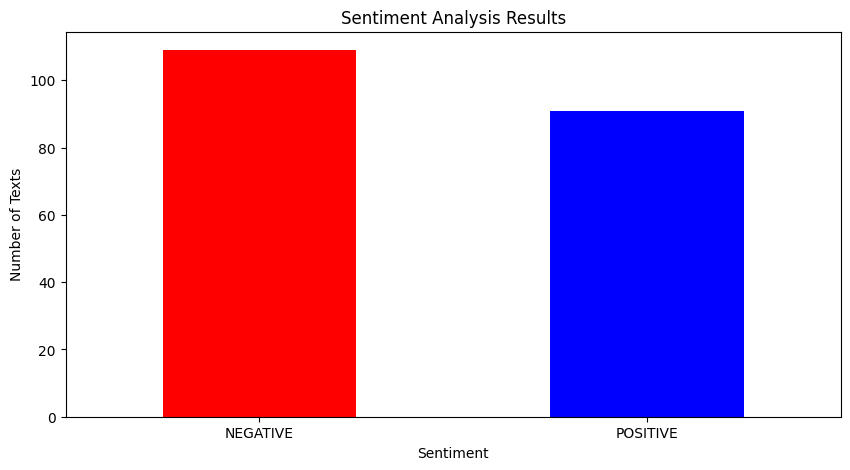

PredictedSentiment
NEGATIVE    109
POSITIVE     91
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
# Count the occurrences of each sentiment
sentiment_counts = df['PredictedSentiment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 5))
sentiment_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Texts')
plt.xticks(rotation=0)
plt.show()

print(sentiment_counts)